**1.INTRODUCTION**

**Bussiness Understanding**

In the competitive landscape of streaming services,with numerous online platforms offering vast libraries of content, a *personalized User Experience* is crucial to deliver a tailored movie-watching experience which encourages longer viewing times, reduces churn rates and improves user satisfaction fostering a deeper connection between the user and the platform 

**Problem statement**

With the increasing volume of movies available across various platforms, users often face difficulty in discovering movies that align with their preferences. Moreover, understanding patterns in user behavior and movie trends is crucial for optimizing recommendation algorithms. The goal is to develop an effective recommendation system and gain insights into user preferences and movie popularity, thereby enhancing user engagement and satisfaction.The system should cater to diverse user preferences and handle the cold start problem for new users with limited rating history.

**Project Objectives**
* To perform data cleaning and exploratory data analysis (EDA) on a movie dataset, which includes user ratings, movie metadata, and tags.
* To build and evaluate different filtering recommendation algorithms, including:
     - **User-based collaborative filtering**
     - **Item-based collaborative filtering**
     - **Model-based collaborative filtering**
     - **Content-based filtering**
* To compare the performance of these algorithms and identify the most effective approach for movie recommendations.
* Implement a hybrid approach that combines collaborative and content-based filtering to address the cold start problem.
* Evaluate the performance of the recommendation model using metrics like RMSE, MAE.
* Provide actionable insights based on user preferences and feedback for continuous improvement of the recommendation system.

**Limitations**


*Limitations*

* **Cold Start Problem:**
New users with few or no ratings may not receive optimal recommendations due to insufficient data for accurate predictions.
* **Data Sparsity:**
The user-item matrix can be sparse, leading to challenges in finding similar users or items, which can affect recommendation accuracy.
* **Static Dataset:**
The MovieLens dataset may not reflect current trends, preferences, or newly released movies, limiting the system's ability to recommend the latest content.
* **Scalability:**
The collaborative filtering approach may face performance issues as the user base and item catalog grow, potentially slowing down recommendation generation.
* **Subjectivity of Ratings:**
User ratings are subjective and can vary widely; different users may interpret the rating scale differently, leading to inconsistencies in the dataset.
* **Limited Contextual Awareness:**
The system may not consider contextual factors (e.g., time of day, user mood, or social influences) that can affect movie preferences.
* **Implementation Complexity:**
While the hybrid approach can improve recommendations, it adds complexity to the system, requiring careful tuning and integration of multiple algorithms

**2.DATA**

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented

**1. Import Libraries**

In [155]:
import pandas as pd

**2.1Data Understanding and Exploratory Data Analysis (EDA)**

Import the DataFiles

In [157]:

links_df = pd.read_csv('Data/links.csv')

print(links_df.shape)
print(links_df.duplicated().sum())
print(links_df.isna().sum())
print(links_df.describe())
links_df.head()

(9742, 3)
0
movieId    0
imdbId     0
tmdbId     8
dtype: int64
             movieId        imdbId         tmdbId
count    9742.000000  9.742000e+03    9734.000000
mean    42200.353623  6.771839e+05   55162.123793
std     52160.494854  1.107228e+06   93653.481487
min         1.000000  4.170000e+02       2.000000
25%      3248.250000  9.518075e+04    9665.500000
50%      7300.000000  1.672605e+05   16529.000000
75%     76232.000000  8.055685e+05   44205.750000
max    193609.000000  8.391976e+06  525662.000000


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [158]:
movies_df = pd.read_csv('Data/movies.csv')

print(movies_df.shape)
print(movies_df.duplicated().sum())
print(movies_df.isna().sum())
print(movies_df.describe())
movies_df.head()

(9742, 3)
0
movieId    0
title      0
genres     0
dtype: int64
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Summary Of Key Insights Of The 'movies' Dataset**

* The Dataset contains information about 9742 *movies*(Rows), including their *movieIDs*, *titles* and *genres* (3 columns) and there data types.
* The dataset has no missing or duplicate values

In [159]:
ratings_df = pd.read_csv('Data/ratings.csv')

print(ratings_df.shape)
print(ratings_df.duplicated().sum())
print(ratings_df.isna().sum())
print(ratings_df.describe())
ratings_df.head()

(100836, 4)
0
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Summary of key insights of the 'ratigs' Dataset**

* The Dataset contains information about 100836 user *ratings* (Rows), including *userIds*,*movieId*(Foreign key) rating and *timestamp* indicating when the rating was made(4 columns) and their data types
* The dataset has no missing or duplicate values

In [161]:
tags_df = pd.read_csv('Data/tags.csv')

print(tags_df.shape)
print(tags_df.duplicated().sum())
print(tags_df.isna().sum())
print(tags_df.describe())
tags_df.head()

(3683, 4)
0
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
            userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.558803  1.721025e+08
min       2.000000       1.000000  1.137179e+09
25%     424.000000    1262.500000  1.137521e+09
50%     474.000000    4454.000000  1.269833e+09
75%     477.000000   39263.000000  1.498457e+09
max     610.000000  193565.000000  1.537099e+09


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


**Summary of key insights of the 'tags' Dataset**

* The Dataset contains information about 3683 *tags* assigned by the user (Rows), including *userIds*,*movieId*(Foreign keys) *tags* and *timestamp* indicating when the tags were added(4 columns) and their data types
* The dataset has no missing or duplicate values


Start with timestamp conversion on ratings and tags dataframes to convert into a readable format.

In [116]:
def process_timestamps(ratings_df):
    
    # Convert 'timestamp' column to datetime
    ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
    
    # Extract various date and time components
    ratings_df['year'] = ratings_df['timestamp'].dt.year
    ratings_df['month'] = ratings_df['timestamp'].dt.month
    ratings_df['day'] = ratings_df['timestamp'].dt.day
    ratings_df['hour'] = ratings_df['timestamp'].dt.hour
    ratings_df['minute'] = ratings_df['timestamp'].dt.minute
    ratings_df['second'] = ratings_df['timestamp'].dt.second

    # Drop the original 'timestamp' column
    ratings_df = ratings_df.drop(columns=['timestamp'])
    
    return ratings_df

ratings_df = process_timestamps(ratings_df)
ratings_df.head()

,userId,movieId,rating,year,month,day,hour,minute,second
0,1,1,4.0,2000,7,30,18,45,3
1,1,3,4.0,2000,7,30,18,20,47
2,1,6,4.0,2000,7,30,18,37,4
3,1,47,5.0,2000,7,30,19,3,35
4,1,50,5.0,2000,7,30,18,48,51


In [117]:
tags_df = process_timestamps(tags_df)
tags_df.head()

,userId,movieId,tag,year,month,day,hour,minute,second
0,2,60756,funny,2015,10,24,19,29,54
1,2,60756,Highly quotable,2015,10,24,19,29,56
2,2,60756,will ferrell,2015,10,24,19,29,52
3,2,89774,Boxing story,2015,10,24,19,33,27
4,2,89774,MMA,2015,10,24,19,33,20


Explode movie_df to avoid the problem of sparcity.

In [118]:
movies_df['genres'] = movies_df['genres'].str.split('|')
movies_df = movies_df.explode('genres')

print('Total no. of genres:', movies_df.genres.nunique())
print(movies_df.genres.value_counts())
movies_df.head()

Total no. of genres: 20
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: genres, dtype: int64


,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


Merge our dataframes.

In [119]:
# Merge ratings_df to movies_df
movie_ratings_df = pd.merge(ratings_df, movies_df, on='movieId', how='left')

print(movie_ratings_df.shape)
movie_ratings_df.head()

(274480, 11)


,userId,movieId,rating,year,month,day,hour,minute,second,title,genres
0,1,1,4.0,2000,7,30,18,45,3,Toy Story (1995),Adventure
1,1,1,4.0,2000,7,30,18,45,3,Toy Story (1995),Animation
2,1,1,4.0,2000,7,30,18,45,3,Toy Story (1995),Children
3,1,1,4.0,2000,7,30,18,45,3,Toy Story (1995),Comedy
4,1,1,4.0,2000,7,30,18,45,3,Toy Story (1995),Fantasy


In [120]:
tags_movies_df = pd.merge(tags_df, movies_df, on = 'movieId', how = 'left')

print(tags_movies_df.shape)
print(tags_movies_df.tag.nunique())
tags_movies_df.head(10)

(9938, 11)


1589


,userId,movieId,tag,year,month,day,hour,minute,second,title,genres
0,2,60756,funny,2015,10,24,19,29,54,Step Brothers (2008),Comedy
1,2,60756,Highly quotable,2015,10,24,19,29,56,Step Brothers (2008),Comedy
2,2,60756,will ferrell,2015,10,24,19,29,52,Step Brothers (2008),Comedy
3,2,89774,Boxing story,2015,10,24,19,33,27,Warrior (2011),Drama
4,2,89774,MMA,2015,10,24,19,33,20,Warrior (2011),Drama
5,2,89774,Tom Hardy,2015,10,24,19,33,25,Warrior (2011),Drama
6,2,106782,drugs,2015,10,24,19,30,54,"Wolf of Wall Street, The (2013)",Comedy
7,2,106782,drugs,2015,10,24,19,30,54,"Wolf of Wall Street, The (2013)",Crime
8,2,106782,drugs,2015,10,24,19,30,54,"Wolf of Wall Street, The (2013)",Drama
9,2,106782,Leonardo DiCaprio,2015,10,24,19,30,51,"Wolf of Wall Street, The (2013)",Comedy


In [121]:
movie_ratings_df.rating.value_counts()

4.0    73030
3.0    54292
3.5    36473
5.0    36452
4.5    23883
2.0    19890
2.5    14982
1.0     7156
1.5     4628
0.5     3694
Name: rating, dtype: int64

In [122]:
print(movie_ratings_df.userId.nunique())
print(movie_ratings_df.movieId.nunique())

610
9724


**2.2 Data Analysis**

**Distribution of Ratings**

We begin by visualizing the ratings distribution to see how users have rated the movies.

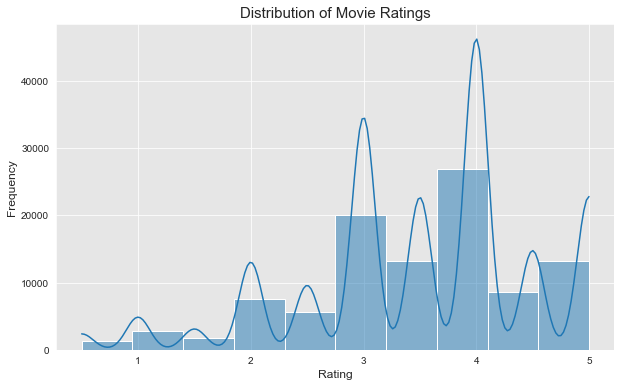

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Setting a style for the plots
sns.set_style('darkgrid', {'axes.facecolor':'0.9'})

# Plotting the distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(ratings_df['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The ratings are highly concentrated around 4, with a peak between 3.5 and 4. This suggests that users generally tend to rate movies favorably, with 4 being the most frequent rating.   

    There is a clear tendency for users to give high ratings (between 3 and 5). Low ratings (below 2) are much less frequent, indicating that most movies are either liked or considered average by the users. 

**Popular Genres**   

    To analyze the popular genres, we'll extract individual genres from the df_movies dataset and count the occurrences.

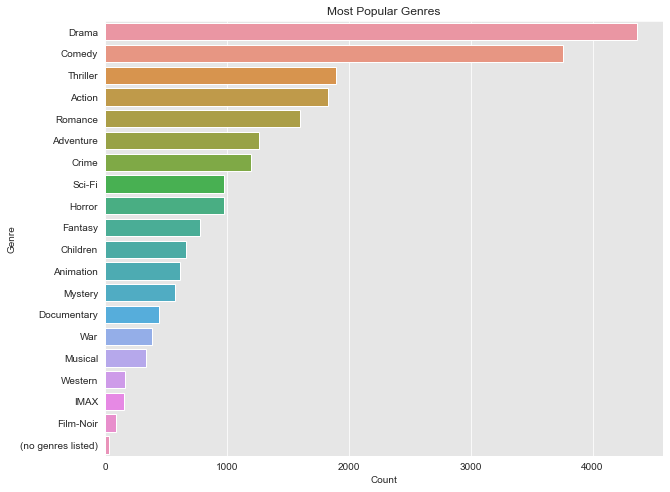

In [124]:
genres = (movies_df['genres'])

# Plot the most popular genres
plt.figure(figsize=(10, 8))
sns.countplot(y=genres, order=genres.value_counts().index)
plt.title('Most Popular Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

`Drama` and `Comedy` are by far the most popular genres, with both appearing in over 4000 movies.     
`Thriller`, `Action`, and `Romance` are also popular, though with slightly fewer appearances.   
Genres like `War`, `Musical`, `Western`, and `IMAX` are much less frequent.  
There's a small portion of movies where no genres are listed, which might be worth investigating.

**Average  Rating By Genres**

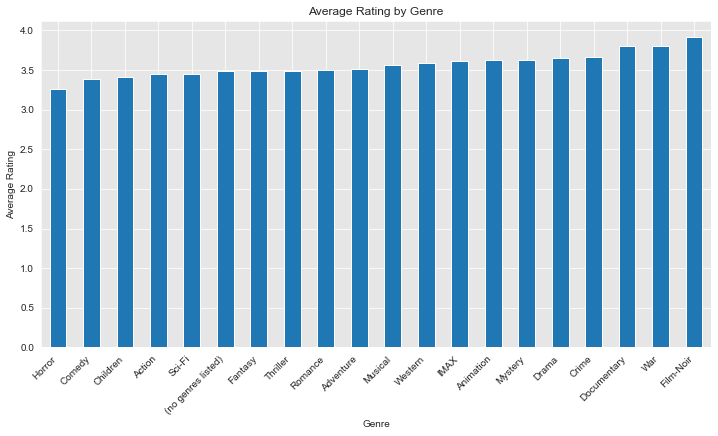

In [125]:
avg_genre_ratings = movies_df.merge(ratings_df, on='movieId').groupby('genres')['rating'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_genre_ratings.plot(kind='bar')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

The ratings are quite consistent across genres, with all averaging between approximately 3.0 and 4.0. Film Noir has the highest average rating, slightly above 3.8, while Horror has the lowest, just below 3.2. This suggests that, on average, viewers tend to rate movies in genres like Film Noir, War, and Documentary slightly higher, while Horror movies tend to receive relatively lower ratings

**Distribution of Rating Count by user**

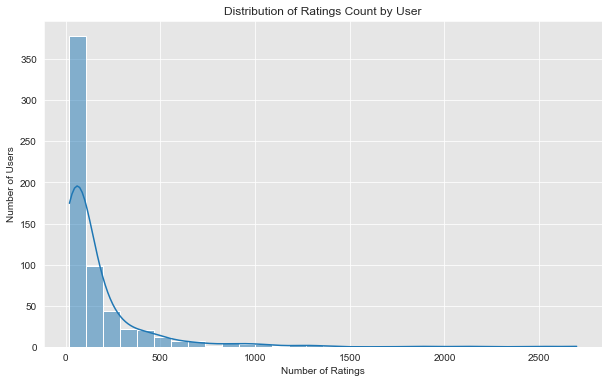

In [126]:
ratings_count_by_user = ratings_df['userId'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_count_by_user, bins=30, kde=True)
plt.title('Distribution of Ratings Count by User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

**Time-based Analysis of Ratings:**
**Purpose:**

This visualization tracks how user ratings change over time. 

It's helpful for spotting trends, such as whether ratings for certain movies or genres are rising or falling in popularity.

- We convert the timestamp into a year and then calculate the average rating per year.
- A line plot is used here to track the evolution of average ratings over time.

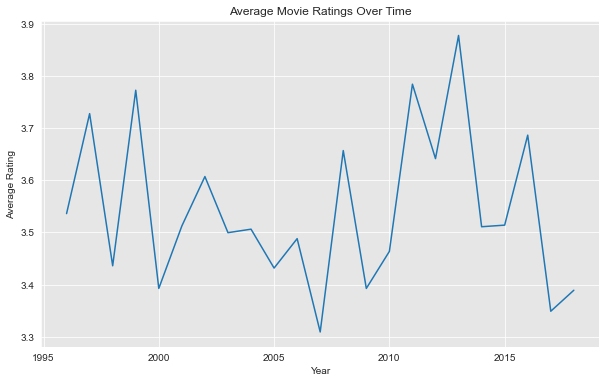

In [127]:
# Convert timestamp to datetime
yearly_ratings = ratings_df.groupby('year')['rating'].mean().reset_index()

# Line plot for average rating per year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='rating', data=yearly_ratings)
plt.title('Average Movie Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

**3.MODELING**

 **Recommendation Systems Algorithms:-**

- KNN algorithm

*a. User-based collaborative filtering*

In [128]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split   

Eradicate sparcity problem by increasing our data density.

In [129]:
# Limit user and movie ratings count to 10
min_user_ratings = 10
min_movie_ratings = 10 


user_ratings_count = movie_ratings_df['userId'].value_counts()
filtered_users = user_ratings_count[user_ratings_count >= min_user_ratings].index

movie_ratings_count = movie_ratings_df['movieId'].value_counts()
filtered_movies = movie_ratings_count[movie_ratings_count >= min_movie_ratings].index

filtered_ratings_df = movie_ratings_df[
    movie_ratings_df['userId'].isin(filtered_users) & 
    movie_ratings_df['movieId'].isin(filtered_movies)
]

filtered_ratings_df.shape

(253684, 11)

Create user-item matrix.

In [130]:
# Create the user-movie matrix
user_movie_matrix = filtered_ratings_df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)
user_movie_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,182715,182823,183897,184471,185029,187031,187541,187593,187595,188301
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train-test split

In [131]:
trainset, testset = train_test_split(user_movie_matrix.index, test_size=0.2, random_state=42)

Define a pipeline for the knn model.

In [132]:
# Define the pipeline steps
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors= 6)) 
])

pipeline_knn.fit(user_movie_matrix.loc[trainset])

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 NearestNeighbors(algorithm='brute', metric='cosine',
                                  n_neighbors=6))])

In [133]:
# K-nearest neighbors and their respective distances for users in test_matrix
distances, indices = pipeline_knn.named_steps['knn'].kneighbors(user_movie_matrix.loc[testset], n_neighbors= 6)

# Loop through each user index to display an organized output
for i, user_index in enumerate(testset):
    print(f"User ID {user_index}:")
    
    for neighbor_idx, distance in zip(indices[i][1:], distances[i][1:]):
        neighbor_user_id = user_movie_matrix.index[neighbor_idx]
        print(f"  Similar User: {neighbor_user_id}, Similarity Distance: {distance:.4f}")
    
    print()

User ID 82:
  Similar User: 423, Similarity Distance: 0.7670
  Similar User: 90, Similarity Distance: 0.8041
  Similar User: 190, Similarity Distance: 0.8086
  Similar User: 373, Similarity Distance: 0.8089
  Similar User: 20, Similarity Distance: 0.8148

User ID 219:
  Similar User: 423, Similarity Distance: 0.7167
  Similar User: 295, Similarity Distance: 0.7222
  Similar User: 100, Similarity Distance: 0.7284
  Similar User: 20, Similarity Distance: 0.7342
  Similar User: 164, Similarity Distance: 0.7377

User ID 56:
  Similar User: 358, Similarity Distance: 0.6118
  Similar User: 158, Similarity Distance: 0.6188
  Similar User: 33, Similarity Distance: 0.6303
  Similar User: 139, Similarity Distance: 0.6387
  Similar User: 147, Similarity Distance: 0.6499

User ID 599:
  Similar User: 190, Similarity Distance: 0.6385
  Similar User: 296, Similarity Distance: 0.6593
  Similar User: 423, Similarity Distance: 0.6725
  Similar User: 164, Similarity Distance: 0.6797
  Similar User: 447,

Model Evaluation

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Create empty lists to store true and predicted ratings
true_ratings = []
predicted_ratings = []

# Iterate over each user in the test set
for i, user_id in enumerate(testset):
    # Get similar users and distances for the current user excluding the user themselves
    similar_users_indices = indices[i][1:] 
    similar_users_distances = distances[i][1:]

    # Actual ratings of the current test user
    user_ratings = user_movie_matrix.loc[user_id]
    
    # Predict rating for each user
    for movie_id in user_ratings.index:
        if user_ratings[movie_id] > 0:
            # Ratings from similar users for this movie
            neighbor_ratings = []
            similarity_weights = []

            for j, neighbor_index in enumerate(similar_users_indices):
                neighbor_user_id = user_movie_matrix.index[neighbor_index]
                neighbor_rating = user_movie_matrix.loc[neighbor_user_id, movie_id]
                
                # Ratings from users who have rated the movie
                if neighbor_rating > 0:
                    neighbor_ratings.append(neighbor_rating)
                    similarity_weights.append(1 - similar_users_distances[j])
            
            # Predict the rating if there are any neighbors with ratings
            if neighbor_ratings:
                weighted_average = np.average(neighbor_ratings, weights=similarity_weights)
            else:
                weighted_average = user_movie_matrix.mean().mean()
            
            # Append to true and predicted lists
            true_ratings.append(user_ratings[movie_id])
            predicted_ratings.append(weighted_average)


rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
mae = mean_absolute_error(true_ratings, predicted_ratings)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

RMSE: 2.8524
MAE: 2.4488


*b. Item-based collaborative filtering*

In [135]:
 #Split data into training and test sets
train_data, test_data = train_test_split(ratings_df, test_size=0.2, random_state=42)

# Create item-user interaction matrices (movies as rows, users as columns)
train_movie_user_matrix = train_data.pivot(index='movieId', columns='userId', values='rating').fillna(0)
test_movie_user_matrix = test_data.pivot(index='movieId', columns='userId', values='rating').fillna(0)

# Align matrices to ensure the same users in both train and test
train_movie_user_matrix, test_movie_user_matrix = train_movie_user_matrix.align(test_movie_user_matrix, join='outer', axis=1, fill_value=0)

# Define the pipeline steps
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors= 6)) 
])

pipeline_knn.fit(train_movie_user_matrix.values)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 NearestNeighbors(algorithm='brute', metric='cosine',
                                  n_neighbors=6))])

In [136]:
def predict_ratings_item_based(train_matrix, knn_model, test_data):
    predictions = []
    for _, row in test_data.iterrows():
        user_id, movie_id = row['userId'], row['movieId']
        
        if movie_id in train_matrix.index:
            # Find similar movies
            _, indices = knn_model.named_steps['knn'].kneighbors(train_matrix.loc[movie_id].values.reshape(1, -1), n_neighbors=6)
            
            # Check if the user_id exists in the train_matrix columns
            if user_id in train_matrix.columns:
                # Get ratings from the user for similar movies
                similar_movies_ratings = train_matrix.iloc[indices.flatten(), train_matrix.columns.get_loc(user_id)]
                
                # Predict rating as the mean of similar movie ratings (excluding zeros)
                non_zero_ratings = similar_movies_ratings[similar_movies_ratings > 0]
                predictions.append(non_zero_ratings.mean() if len(non_zero_ratings) > 0 else 0)
            else:
                # If user_id not in train_matrix columns, assign default rating
                predictions.append(0)
        else:
            predictions.append(0)  # Default rating for unknown movies
    return predictions

In [137]:
distances, indices = pipeline_knn.named_steps['knn'].kneighbors(test_movie_user_matrix.values, n_neighbors=6)

**2.1 Distribution of Ratings**  

    We'll begin by visualizing the distribution of movie ratings to see how users have rated the movies.

In [138]:
# Call the prediction function
predicted_ratings = predict_ratings_item_based(train_movie_user_matrix, pipeline_knn, test_data)
print(predicted_ratings)

[0, 2.875, 2.375, 4.0, 0, 3.0, 4.0, 0, 3.0, 4.5, 0, 0, 3.125, 2.5, 4.0, 0, 0, 0, 3.75, 0, 3.375, 0, 3.75, 4.0, 4.0, 2.5, 0, 3.0, 4.0, 0, 3.5, 0, 2.5, 3.0, 0, 0, 2.5, 3.75, 3.3, 0, 0, 0, 4.666666666666667, 0, 5.0, 0, 0, 3.5, 0, 1.0, 4.5, 4.0, 3.0, 0, 3.0, 3.5, 0, 0, 4.5, 2.5, 5.0, 0, 0, 3.0, 2.5, 5.0, 0, 4.0, 4.0, 0, 0, 0, 0, 4.25, 0, 0, 0, 0, 0, 0, 3.5, 0, 0, 1.0, 3.75, 2.0, 0, 4.5, 2.5, 4.5, 0, 0, 3.0, 0, 4.0, 0, 3.25, 4.0, 4.5, 0, 0, 2.8333333333333335, 0, 0, 4.0, 0, 3.0, 0, 5.0, 2.0, 3.1666666666666665, 4.0, 0, 4.0, 3.1666666666666665, 3.9, 0, 4.0, 0, 3.0, 0, 0, 0, 2.5, 0, 4.5, 3.75, 4.0, 3.2, 0, 4.666666666666667, 3.5, 5.0, 0, 4.6, 4.0, 2.6666666666666665, 0, 0, 0, 0, 0, 0, 4.25, 0, 2.75, 0, 0, 4.0, 4.5, 5.0, 3.0, 4.25, 3.0, 0, 0, 0, 0, 0, 3.0, 3.3333333333333335, 3.75, 0, 3.25, 3.0, 0, 0, 5.0, 0, 4.5, 0, 0, 3.0, 4.0, 0, 0, 0, 4.0, 0, 1.0, 4.4, 4.5, 0, 0, 0, 4.5, 2.0, 3.0, 0, 4.5, 0, 3.75, 0, 0, 0, 0, 0, 0, 0, 4.0, 0, 4.25, 4.4, 3.5, 0, 4.0, 3.8333333333333335, 3.0, 0, 4.0, 3.0, 0,

Model evaluation

In [139]:
# Evaluate predictions
actual_ratings = test_data['rating']
mae = mean_absolute_error(actual_ratings, predicted_ratings)
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

print(f'MAE: {mae:.4f}, RMSE: {rmse:.4f}')

MAE: 1.9120, RMSE: 2.4973


- Model-based algorithm

In [140]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split


# Load data into Surprise format
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(movie_ratings_df[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.25)

# Use Singular Value Decomposition (SVD) for model-based collaborative filtering
algo = SVD()
algo.fit(trainset)

# Predict ratings
predictions = algo.test(testset)

# Evaluate model accuracy
accuracy.rmse(predictions)

RMSE: 0.5324


0.5323756149341741

In [141]:
predictions_df = pd.DataFrame(predictions, columns= ['user_id', 'item_id', 'true_rating', 'estimated_rating', 'details'])
predictions_df.head(10)

,user_id,item_id,true_rating,estimated_rating,details
0,68,7,2.0,2.594849,{'was_impossible': False}
1,165,3409,3.0,3.264441,{'was_impossible': False}
2,160,6,2.0,2.222813,{'was_impossible': False}
3,591,3897,3.0,3.610050,{'was_impossible': False}
4,192,349,5.0,4.886119,{'was_impossible': False}
5,187,3949,5.0,4.524497,{'was_impossible': False}
6,111,170399,4.0,3.866654,{'was_impossible': False}
7,510,6323,1.5,1.860107,{'was_impossible': False}
8,298,40819,2.5,2.361514,{'was_impossible': False}
9,19,291,2.0,2.343855,{'was_impossible': False}


In [142]:
user_ids = movie_ratings_df['userId'].unique()
movie_ids = movie_ratings_df['movieId'].unique()

# Number of reccomendations to make
N = 5
recommendations = {}

# Loop over each user
for user_id in user_ids:
    rated_movie_ids = movie_ratings_df[movie_ratings_df['userId'] == user_id]['movieId'].unique()

    unrated_movie_ids = [m_id for m_id in movie_ids if m_id not in rated_movie_ids]

    # Predict ratings for the unrated movies
    predictions = [algo.predict(user_id, m_id) for m_id in unrated_movie_ids]

    # Sort predictions by estimated rating (highest first)
    predictions.sort(key=lambda x: x.est, reverse=True)

    top_n_recommendations = predictions[:N]

    # Store the recommendations for each user
    recommendations[user_id] = [(pred.iid, pred.est) for pred in top_n_recommendations]

In [143]:
# Display top 5 recommendations for all users
for user_id, recs in recommendations.items():
    print(f'\nTop {N} recommendations for User {user_id}:')
    for movie_id, predicted_rating in recs:
        print(f'Movie ID: {movie_id}, Predicted Rating: {predicted_rating:.2f}')


Top 5 recommendations for User 1:
Movie ID: 318, Predicted Rating: 5.00
Movie ID: 68157, Predicted Rating: 5.00
Movie ID: 80906, Predicted Rating: 5.00
Movie ID: 720, Predicted Rating: 5.00
Movie ID: 1272, Predicted Rating: 5.00

Top 5 recommendations for User 2:
Movie ID: 1210, Predicted Rating: 4.61
Movie ID: 7153, Predicted Rating: 4.51
Movie ID: 60069, Predicted Rating: 4.51
Movie ID: 5952, Predicted Rating: 4.50
Movie ID: 1247, Predicted Rating: 4.49

Top 5 recommendations for User 3:
Movie ID: 1197, Predicted Rating: 4.42
Movie ID: 4973, Predicted Rating: 4.37
Movie ID: 1235, Predicted Rating: 4.35
Movie ID: 1912, Predicted Rating: 4.31
Movie ID: 1136, Predicted Rating: 4.19

Top 5 recommendations for User 4:
Movie ID: 2160, Predicted Rating: 4.77
Movie ID: 3468, Predicted Rating: 4.70
Movie ID: 913, Predicted Rating: 4.69
Movie ID: 527, Predicted Rating: 4.65
Movie ID: 1252, Predicted Rating: 4.64

Top 5 recommendations for User 5:
Movie ID: 1276, Predicted Rating: 4.58
Movie I

In [144]:
predictions_df = pd.DataFrame(predictions, columns= ['user_id', 'item_id', 'true_rating', 'estimated_rating', 'details'])
predictions_df.head()

,user_id,item_id,true_rating,estimated_rating,details
0,610,3435,None,4.805425,{'was_impossible': False}
1,610,1206,None,4.740886,{'was_impossible': False}
2,610,1079,None,4.739912,{'was_impossible': False}
3,610,599,None,4.737928,{'was_impossible': False}
4,610,1148,None,4.731145,{'was_impossible': False}


- Content based algorithm

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Using TF-IDF to compute similarity based on movie genres
movies_df['genres'] = movies_df['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Vectorize genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['genres'])

# Compute similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get movie recommendations based on similarity score
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = movies_df[movies_df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10
    movie_indices = [i[0] for i in sim_scores]
    return movies_df['title'].iloc[movie_indices]

# Get recommendations for a specific movie
recommendations = get_recommendations('Toy Story (1995)')
print(recommendations)

1                                        Jumanji (1995)
7                                   Tom and Huck (1995)
9                                      GoldenEye (1995)
12                                         Balto (1995)
14                              Cutthroat Island (1995)
28    City of Lost Children, The (Cité des enfants p...
40                                 Mortal Kombat (1995)
48                                      Lamerica (1994)
53                   Indian in the Cupboard, The (1995)
77                                  White Squall (1996)
Name: title, dtype: object


- Hybrid algorithm

In [146]:
# Assume you have a user and movie to recommend for
user_id = 1
movie_title = 'Toy Story (1995)'
movie_idx = movies_df[movies_df['title'] == movie_title].index[0]

# Get content-based recommendations for a given movie
content_recs = get_recommendations(movie_title)

# Predict rating using collaborative filtering
movie_id = movies_df.loc[movie_idx, 'movieId'].values[0]
collab_pred = algo.predict(user_id, movie_id).est

# Assume we assign a weight to each component
collab_weight = 0.7
content_weight = 0.3

# Hybrid score: weighted average of collaborative and content-based score
# For simplicity, using 5.0 as the max score in content-based ranking
content_sim_score = cosine_sim[movie_idx].mean() * 5.0
hybrid_score = collab_weight * collab_pred + content_weight * content_sim_score

print(f'Collaborative score: {collab_pred}')
print(f'Content-based similarity score: {content_sim_score}')
print(f'Hybrid score: {hybrid_score}')

Collaborative score: 4.353671837299075
Content-based similarity score: 0.28595363158848036
Hybrid score: 3.133356375585896


In [153]:
collab_rmse = accuracy.rmse(collab_pred)

TypeError: 'numpy.float64' object is not iterable

### 4. Project Findings
   - **Exploratory Data Analysis (EDA):** The dataset requires timestamp conversion. Ratings data reveals a distribution skewed towards higher ratings, with 4 and 5-star ratings being the most common. 
   - **Genre Distribution:** Some genres are more popular than others, with Drama, Comedy, and Thriller being among the top genres.
   - **Collaborative Filtering (User and Item-Based):** Collaborative filtering based on users and items provides recommendations based on similar users or movies. Both user-based and item-based collaborative filtering were implemented using k-nearest neighbors (KNN) and evaluated using metrics such as RMSE and MAE.
   - **Model-Based Collaborative Filtering:** Using Singular Value Decomposition (SVD), the system predicts ratings for unrated movies based on learned patterns in the ratings matrix. The SVD model yielded relatively low RMSE, indicating strong predictive performance.
   - **Content-Based Filtering:** By utilizing TF-IDF vectors of genres, this approach successfully recommended movies with similar genres to the target movie.
   - **Hybrid Recommendation System:** Combining collaborative filtering and content-based filtering with weighted scores resulted in a comprehensive approach that capitalizes on the strengths of both methods.
   - **Performance Metrics:** The RMSE and MAE metrics indicate that the model-based (SVD) and hybrid approaches provide a balance between accuracy and computational efficiency.

  ### Conclusions
   The project demonstrates the effectiveness of various recommendation systems. Collaborative filtering works well when user and item interactions are dense, but may struggle with sparse datasets. Model-based filtering (SVD) offers a good balance of accuracy and scalability, while the hybrid system enhances recommendation quality by combining collaborative and content-based approaches.

###  Recommendations

 - For production, implement a hybrid model with a tunable weight between collaborative and content-based scores to personalize recommendations further based on user behavior.This helps address the "cold start" problem for new users or movies with few ratings.
 -  Implement strategies to account for user biases in ratings, such as users who consistently rate movies higher or lower than average. Normalizing ratings or weighing ratings based on user behavior can improve recommendation
- Regularly update the recommendation system with new ratings and movie data to keep the recommendations relevant.
- Monitor the system performance over time and retrain models periodically to maintain high accuracy as user preferences evolve.
- Consider expanding the model to include additional features (e.g., movie descriptions, directors, actors) to improve the content-based component and enhance recommendation diversity.